In [62]:
import string
import random
import numpy as np
import matplotlib.pyplot as plt

                                                    DAWKINS' WEASEL MODEL OF EVOLUTION

Start with a generated 19 letter string, where each letter is randomly generated. Each generation, create 10 copies of this code, where each letter has a 1% probability of mutating into a different letter. Select the string that has the most matching letters with the string 'METHINKSITISAWEASEL' and create 10 copies of it. Repeat this process until obtaining the string 'METHINKSITISAWEASEL'. 

In [63]:
WEASEL = 'METHINKSITISAWEASEL'

In [151]:
def compute_similarity(phrase):
    similarity = 0
    for x in range(0,19):
        if phrase[x] == WEASEL[x]:
            similarity += 1
    return similarity
    
def generate_parent():
    parent = ''
    for _ in range(19):
        letter = random.choice(string.ascii_uppercase)
        parent += letter
    similarity = compute_similarity(parent)
    return parent, similarity

def next_generation(parent, similarity, num_children):
    best_child = parent
    best_similarity = similarity
    for _ in range(num_children):
        child = ''
        for x in range(0,19):
            if random.randint(1,100) == 1:
                mutation = parent[x]
                while mutation == parent[x]:
                    mutation = random.choice(string.ascii_uppercase)
                child += mutation
            else:
                child += parent[x]
        child_similarity = compute_similarity(child)
        if child_similarity > best_similarity:
            best_child = child
            best_similarity = child_similarity
    return best_child, child_similarity

def simulate(n):
    phrase, similarity = generate_parent()
    generations = 1
    while similarity < 19:
        phrase, similarity = next_generation(phrase, similarity, n)
        generations += 1
    return generations

def simulate_and_plot():
    sim_lst = []
    phrase, similarity = generate_parent()
    generations = 1
    while similarity < 19:
        phrase, similarity = next_generation(phrase, similarity)
        generations += 1
        sim_lst.append(similarity)
    X = range(1,generations)
    plt.plot(X,sim_lst, label='Correct letters over time')
    plt.ylabel('number of correct letters')
    plt.xlabel('generations')
    plt.yticks(range(0,20,2))
    plt.show()

def basic_model_monte_carlo(n, trials):
    gen_lst = []
    for _ in range(trials):
        generations = simulate(n)
        gen_lst.append(generations)
    gen_array = np.array(gen_lst)
    print('Mean generations taken:', gen_array.mean())
    print('Standard deviation of generations taken:', gen_array.std())
    plt.hist(gen_array, bins=10)
    plt.xlabel('generations until replication')
    plt.ylabel('frequency')
    plt.show()


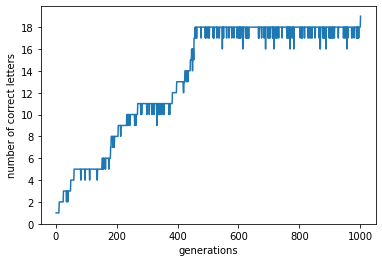

In [98]:
simulate_and_plot()

Mean generations taken: 1012.179
Standard deviation of generations taken: 369.70122066203675


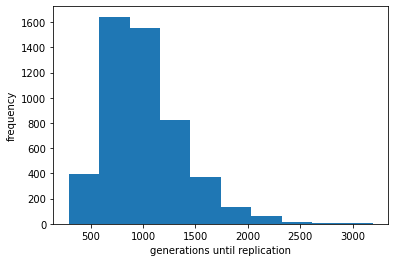

In [86]:
gen_lst = []
for _ in range(5000):
    generations = simulate(10)
    gen_lst.append(generations)
gen_array = np.array(gen_lst)
print('Mean generations taken:', gen_array.mean())
print('Standard deviation of generations taken:', gen_array.std())
plt.hist(gen_array, bins=10)
plt.xlabel('generations until replication')
plt.ylabel('frequency')
plt.show()

                                                    DAWKINS' WEASEL MODEL WITH RECOMBINATION

Here, we allow for recombination every r generations of two lineages of phrases that each produce n offspring every generations. We compare the rates at which a perfect reconstruction of the phrase occurs of this recombination model with the simple model above where 2n offspring are produced every generation. 

In [144]:
def recombine(phrase1, phrase2):
    new_phrase1_lst = []
    new_phrase2_lst = []
    for x in range(0,19):
        flip = random.randint(1,2)
        if flip == 2:
            new_phrase1_lst.append(phrase1[x])
            new_phrase2_lst.append(phrase2[x])
        else:
            new_phrase1_lst.append(phrase2[x])
            new_phrase2_lst.append(phrase1[x])
    new_phrase1 = ''.join(new_phrase1_lst)
    new_phrase2 = ''.join(new_phrase2_lst)
    similarity1 = compute_similarity(new_phrase1)
    similarity2 = compute_similarity(new_phrase2)
    return new_phrase1, similarity1, new_phrase2, similarity2

def simulate_recombination(n,r):
    phrase1, similarity1 = generate_parent()
    phrase2, similarity2 = generate_parent()
    generations = 1
    ticker = r
    while (similarity1 < 19) and (similarity2 < 19):
        phrase1, similarity1 = next_generation(phrase1, similarity1, n)
        phrase2, similarity2 = next_generation(phrase2, similarity2, n)
        generations += 1
        ticker -= 1
        if ticker == 0:
            ticker = r
            phrase1, similarity1, phrase2, similarity2 = recombine(phrase1, phrase2)
    return generations

def recombination_monte_carlo(n,r,trials):
    gen_lst = []
    for _ in range(trials):
        generations = simulate_recombination(n,r)
        gen_lst.append(generations)
    gen_array = np.array(gen_lst)
    print('Mean generations taken:', gen_array.mean())
    print('Standard deviation of generations taken:', gen_array.std())
    plt.hist(gen_array, bins=10)
    plt.xlabel('generations until replication')
    plt.ylabel('frequency')
    plt.show()
    

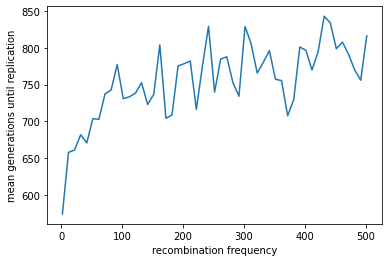

In [148]:
r_lst = np.linspace(2,502,51)
mean_gens_lst = []
for r in r_lst:
    gen_lst = []
    for _ in range(50):
        generations = simulate_recombination(10,r)
        gen_lst.append(generations)
    gen_array = np.array(gen_lst)
    mean_gens = gen_array.mean()
    mean_gens_lst.append(mean_gens)
plt.plot(r_lst,mean_gens_lst)
plt.ylabel('mean generations until replication')
plt.xlabel('recombination frequency')
plt.show()

Mean generations taken: 622.5408
Standard deviation of generations taken: 160.62739845792188


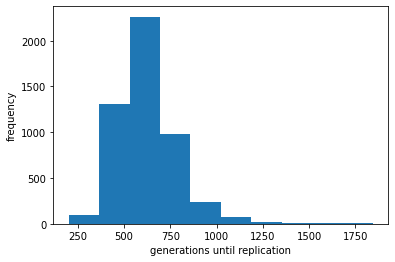

In [149]:
recombination_monte_carlo(10,10,5000)

Mean generations taken: 515.3056
Standard deviation of generations taken: 185.98720442180962


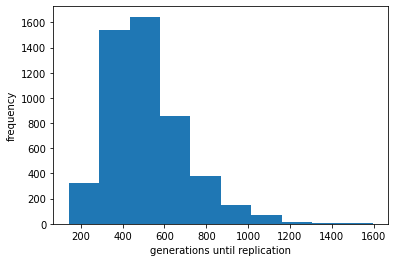

In [152]:
basic_model_monte_carlo(20, 5000)